# Imports

In [104]:
# Data handling
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
# Data
import sklearn.datasets as data_source

sns.set_style('darkgrid')

# Loading data and recasting of columns

In [50]:
diabetes__data_dict = data_source.load_diabetes(as_frame=True, scaled=False)
diabetesDF = diabetes__data_dict.data
diabetesDF['Diabetes progression'] = diabetes__data_dict.target
diabetesDF.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes progression
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0


In [96]:
diabetesDF.shape

(442, 11)

In [51]:
if 's1' in diabetesDF.columns:
    # Want to rename some columns to more descriptive names
    column_rename_mapper = {
        's1': 'tc',  # total serum cholesterol
        's2': 'ldl', # low-density lipoproteins
        's3': 'hdl', # high-density lipoproteins
        's4': 'tch', # total cholesterol
        's5': 'ltg', # log of serum triglycerides level
        's6': 'glu', # blood glucose level
    }
    diabetesDF.rename(columns=column_rename_mapper, inplace=True) # inplace=True changes the dataframe "in place", otherwise you could do it as in the line under
    # diabetesDF = diabetesDF.rename(columns=column_rename_mapper)

    # Want to make the 'sex' column categorical
    diabetesDF['sex'] = diabetesDF['sex'].map(lambda x: 'male' if x == 2.0 else 'female')

    # Want to recast the datatype of some columns to integer
    integer_cols = ['age', 'bp', 'tc', 'hdl', 'glu', 'Diabetes progression']
    for col in integer_cols:
        diabetesDF[col] = diabetesDF[col].astype(np.int64)

diabetesDF.head(40)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,Diabetes progression
0,59,male,32.1,101,157,93.2,38,4.00,4.8598,87,151
1,48,female,21.6,87,183,103.2,70,3.00,3.8918,69,75
2,72,male,30.5,93,156,93.6,41,4.00,4.6728,85,141
3,24,female,25.3,84,198,131.4,40,5.00,4.8903,89,206
4,50,female,23.0,101,192,125.4,52,4.00,4.2905,80,135
5,23,female,22.6,89,139,64.8,61,2.00,4.1897,68,97
6,36,male,22.0,90,160,99.6,50,3.00,3.9512,82,138
7,66,male,26.2,114,255,185.0,56,4.55,4.2485,92,63
8,60,male,32.1,83,179,119.4,42,4.00,4.4773,94,110
9,29,female,30.0,85,180,93.4,43,4.00,5.3845,88,310


# Inspecting data

### Numerical inspection

In [52]:
diabetesDF.dtypes

age                       int64
sex                      object
bmi                     float64
bp                        int64
tc                        int64
ldl                     float64
hdl                       int64
tch                     float64
ltg                     float64
glu                       int64
Diabetes progression      int64
dtype: object

In [53]:
diabetesDF.describe()

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,Diabetes progression
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.601810,189.140271,115.439140,49.787330,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.418122,13.833142,34.608052,30.413081,12.934863,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Visual inspection

##### Histograms

Feel free to play around with the code by checking out the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html)

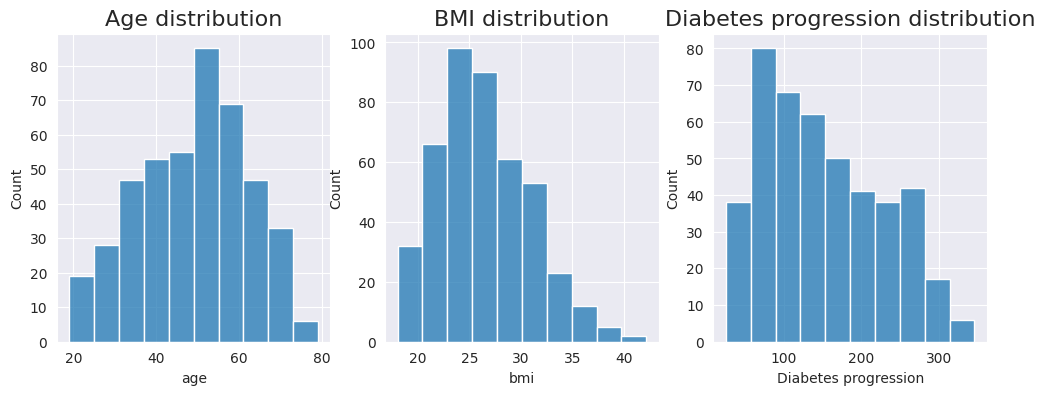

In [101]:
# Numerical histogram distribution with sns.histplot
var_title_dict = {'age'                 : 'Age distribution', 
                  'bmi'                 : 'BMI distribution', 
                  'Diabetes progression': 'Diabetes progression distribution'}

fig, axes = plt.subplots(1,3,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.histplot(data=diabetesDF[var], ax=axes[idx], bins=10)
    axes[idx].set_title(var_title_dict[var], fontsize=16)

plt.show()

Feel free to play around with the code by checking out the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)

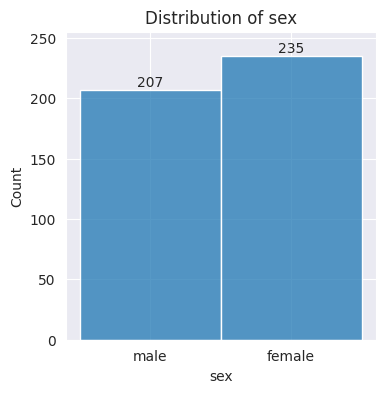

In [74]:
# Categorical histogram distribution with sns.barplot
fig, axes = plt.subplots(1,1,figsize=(4,4))
sns.histplot(data=diabetesDF, x='sex', ax=axes)

axes.set_title('Distribution of sex')
axes.set_ylim([0, 255])

# Code for putting the count of the bar on top
for p in axes.patches:
    height = p.get_height()
    position_x = p.get_x() + p.get_width() / 2
    axes.text(position_x, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.show()

##### Density plots

Feel free to play around with the code by checking out the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

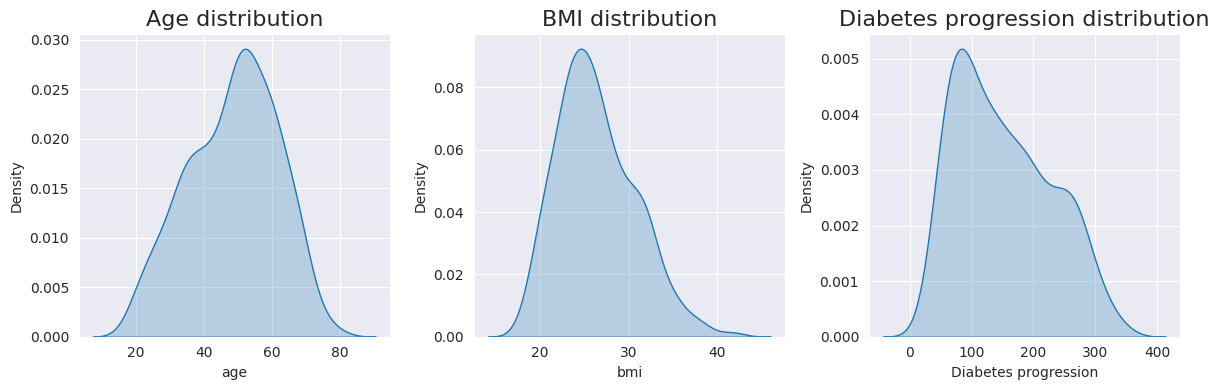

In [100]:
# Density distribution with sns.kdeplot
fig, axes = plt.subplots(1,3,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.kdeplot(data=diabetesDF[var], ax=axes[idx], fill=True)
    axes[idx].set_title(var_title_dict[var], fontsize=16)

fig.tight_layout()
plt.show()

##### Box and whisker plots

Feel free to play around with the code by checking out the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

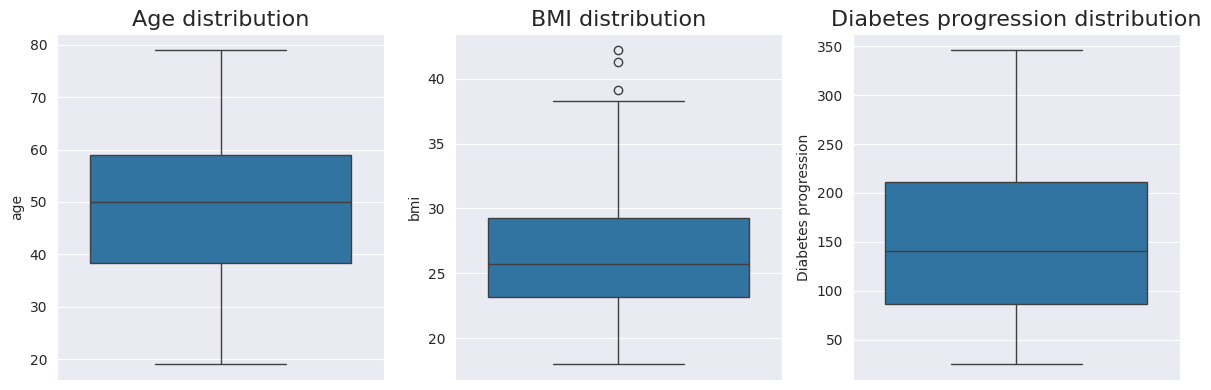

In [99]:
# Density distribution with sns.kdeplot
fig, axes = plt.subplots(1,3,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.boxplot(data=diabetesDF[var], ax=axes[idx])
    axes[idx].set_title(var_title_dict[var], fontsize=16)

fig.tight_layout()
plt.show()

##### Violin plots

Feel free to play around with the code by checking out the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

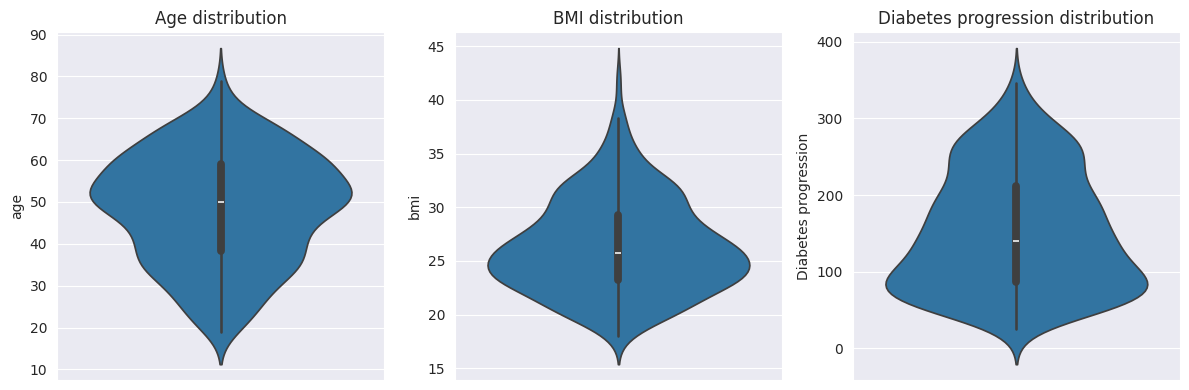

In [87]:
# Density distribution with sns.violinplot
fig, axes = plt.subplots(1,3,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.violinplot(data=diabetesDF, y=var, ax=axes[idx])
    axes[idx].set_title(var_title_dict[var])

fig.tight_layout()
plt.show()

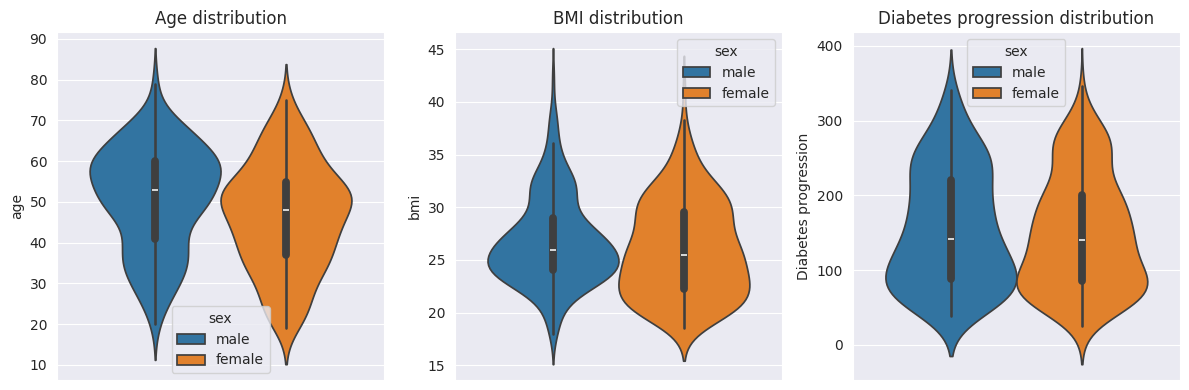

In [88]:
# Density distribution with sns.kdeplot
fig, axes = plt.subplots(1,3,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.violinplot(data=diabetesDF, y=var, ax=axes[idx], hue='sex')
    axes[idx].set_title(var_title_dict[var])

fig.tight_layout()
plt.show()

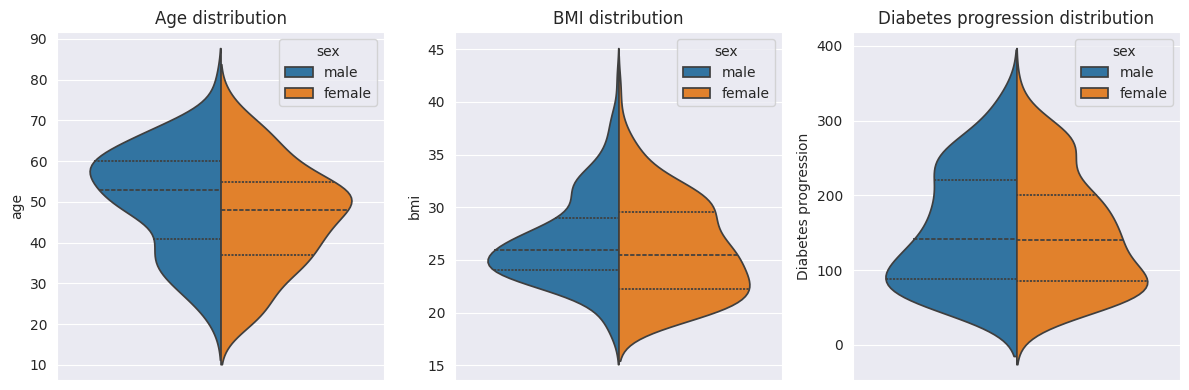

In [85]:
# Density distribution with sns.kdeplot
fig, axes = plt.subplots(1,3,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.violinplot(data=diabetesDF, y=var, ax=axes[idx], hue='sex', split=True, inner='quart')
    axes[idx].set_title(var_title_dict[var])

fig.tight_layout()
plt.show()

##### Heatmaps

Feel free to play around with the code by checking out the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

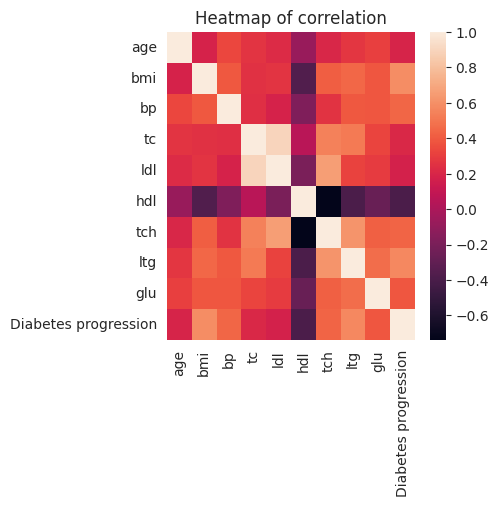

In [94]:
# Correlation heatmap with sns.heatmap
diabetesCorrDF = diabetesDF.drop('sex', axis=1).corr() # Have to remove categorical columns before we can compute linear correlation

fig, axes = plt.subplots(1,1,figsize=(4,4))
sns.heatmap(diabetesCorrDF, ax=axes)

axes.set_title('Heatmap of correlation')

plt.show()

##### Scatter Plot matrix

Feel free to play around with the code by checking out the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [106]:
smallDiabetesDF = diabetesDF[['age', 'sex', 'bmi', 'Diabetes progression']]

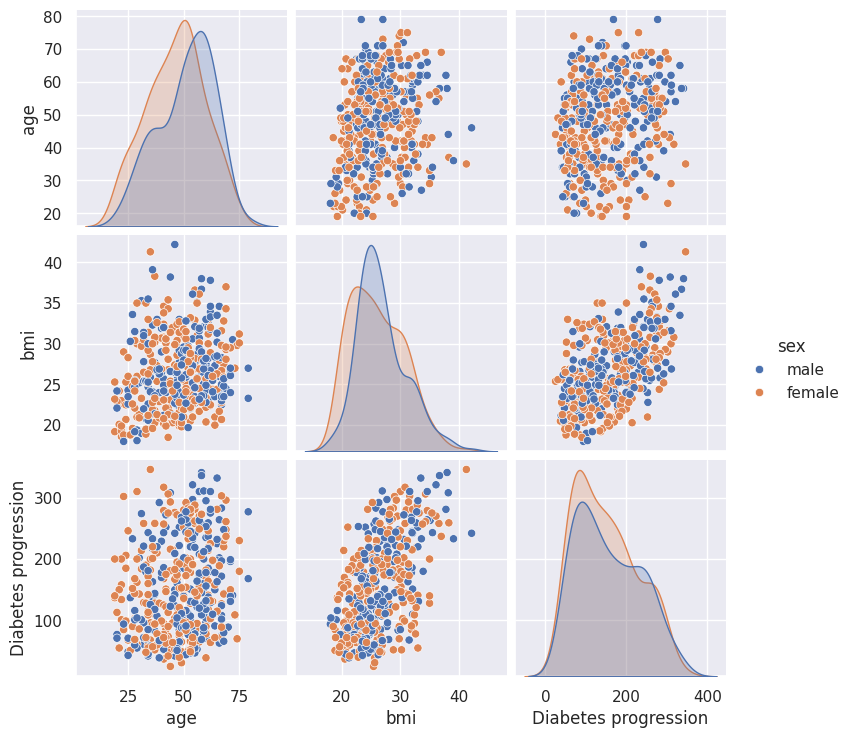

In [108]:
# With hue
sns.pairplot(smallDiabetesDF, hue="sex")
plt.show()

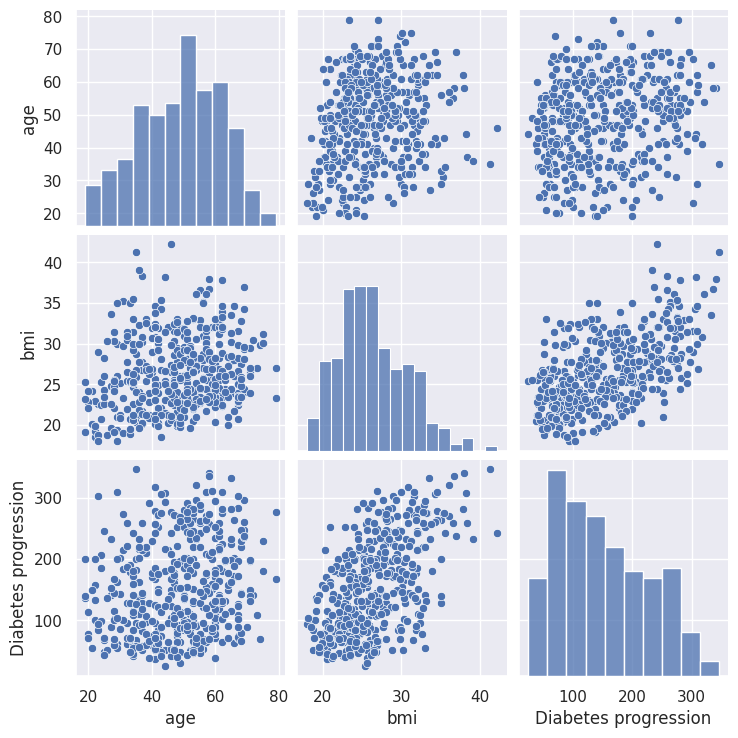

In [107]:
# Without hue
sns.pairplot(smallDiabetesDF)
plt.show()